# Setting

In [1]:
from pf_utils import BacktestManager, DataManager, StaticPortfolio, MomentumPortfolio, AssetEvaluator, metrics

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [3]:
download = False
close_today = False

# universe and file
uv_k200 = ['kospi200', 'kospi200_prices.csv']
uv_etf  = ['etf', 'etfs_all.csv']
uv_irp  = ['fund', 'funds_irp.csv']
uv_hana = ['fund', 'funds_kebhana.csv']

## KOSPI200

In [4]:
k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_k200))
)
k200.upload()

200 assets from 2021-01-04 to 2024-07-15 uploaded.
df_prices updated


In [5]:
kw = dict(
    n_years=3, 
    close_today=close_today,
    #tickers=k200.df_prices.columns
)
k200.download(**kw) if download else None

In [6]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

No data found
ERROR: '005930'


## ETF

In [4]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_etf)))
etf.upload()

872 assets from 2021-01-04 to 2024-07-16 uploaded.
df_prices updated


In [5]:
kw = dict(
    n_years=3, 
    close_today=close_today,
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if download else None

In [6]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[choice]
assetnames_etf = etf.get_names(tickers=choice)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## IRP - TDF
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [10]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_irp))
)
irp.upload()
irp.get_date_range()

Estimating price from rate ...
  error: -0.07 %
  error: -0.00 %
  error: 0.16 %
  error: -0.13 %
  error: 0.00 %
5 assets from 2017-08-14 to 2024-07-15 uploaded.
df_prices updated


,start date,end date
K55301BU5479,2017-08-14,2024-06-16
K55301BU6139,2017-09-20,2024-07-14
K55301BU5453,2017-09-29,2024-06-16
K55206C96311,2018-07-13,2024-06-17
K55206C95800,2018-07-26,2024-07-15


In [11]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()
assetnames_irp

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
4) K55206C96311: 키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

## HANA - FUNDS

In [12]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_hana))
)
hana.upload()
hana.get_date_range()

Estimating price from rate ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-06-28 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-06-28
KR5370AP9956,2014-04-30,2024-06-28
KR5236AS4826,2014-05-30,2024-06-28
K55306CV9946,2019-10-31,2024-06-28


In [13]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

# Backtest

## KOSPI 200

In [8]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    asset_names = assetnames_k200
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [15]:
lags = dict(lookback=12, lag=5)

In [16]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [17]:
select = 'Momentum'
kwargs_build = dict(
    name=f'KOSPI:{select}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=5, **lags
)
bm.build(**kwargs_build)

In [16]:
select = 'K-ratio'
kwargs_build.update(dict(
    name=f'KOSPI:{select}', select =select,
))
bm.build(**kwargs_build)

Backtesting 2 strategies: KODEX200, KOSPI:Momentum


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.49it/s]

Returning stats


,KOSPI:Momentum,KODEX200
start,2021-01-03,2021-01-03
end,2024-07-15,2024-07-15
total_return,6.076125,0.073467
cagr,0.740994,0.020291
calmar,2.81907,0.072933
max_drawdown,-0.262851,-0.278222
avg_drawdown,-0.059227,-0.053124
avg_drawdown_days,17.604651,150.666667
daily_vol,0.39115,0.145841
daily_sharpe,1.642354,0.213445


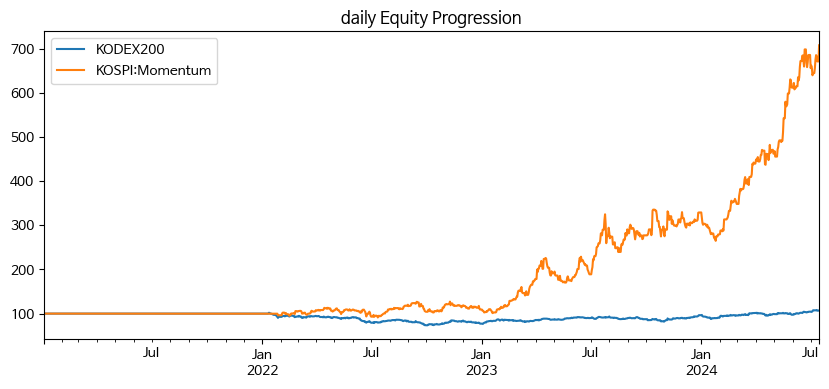

In [18]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [19]:
df_pf = bm.get_historical()
df_pf = df_pf[['KODEX200','KOSPI:Momentum']]

## ETF

In [31]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = assetnames_etf
)
bm = BacktestManager(df_etf, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-07-16
running self.util_check_days_in_year to check days in a year


In [33]:
lags = dict(lookback=12, lag=5)

In [34]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [35]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='ETF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='ETF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='ETF:InvVol', weigh='InvVol', **kwargs_build)

Backtesting 4 strategies: KODEX200, ETF:Eqaully, ETF:ERC, ETF:InvVol


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.72it/s]


Returning stats


,ETF:Eqaully,ETF:ERC,ETF:InvVol,KODEX200
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-07-16,2024-07-16,2024-07-16,2024-07-16
total_return,0.274542,0.227303,0.201854,0.340336
cagr,0.098298,0.082382,0.073651,0.119874
calmar,2.673818,2.140583,1.952213,0.951073
max_drawdown,-0.036763,-0.038486,-0.037727,-0.126041
avg_drawdown,-0.007653,-0.007471,-0.00685,-0.025178
avg_drawdown_days,12.527778,17.384615,17.5,19.115385
daily_vol,0.046124,0.040464,0.038891,0.125839
daily_sharpe,2.107371,2.026137,1.892923,0.985233


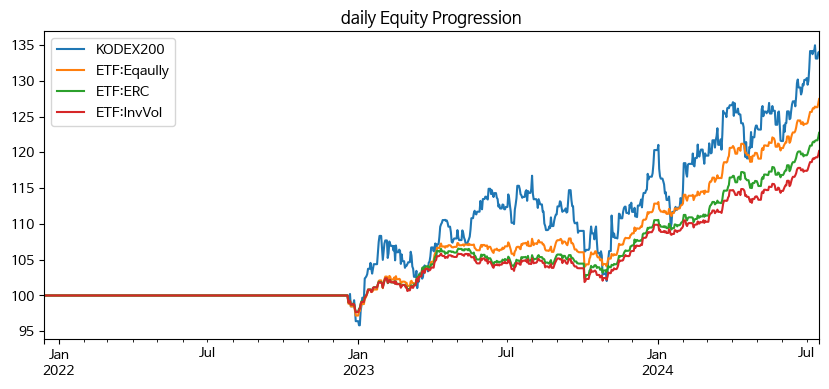

In [29]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [25]:
df = bm.get_historical()
df_pf = df_pf.join(df[['ETF:Eqaully', 'ETF:ERC']])

## IRP

In [26]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)
bm = BacktestManager(df_irp, **kwargs_bm)

period reset: 2018-07-26 ~ 2024-06-16
running self.util_check_days_in_year to check days in a year


In [27]:
lags = dict(lookback=12, lag=5)

In [28]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [29]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='TDF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='TDF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='TDF:InvVol', weigh='InvVol', **kwargs_build)

In [30]:
choice = ['K55301BU6139', 'K55206C95800']

kwargs_build.update(dict(
    name='TDF2:Eqaully', select ='all', 
    weigh='Specified',  weights=choice
))
bm.build(**kwargs_build)

Backtesting 5 strategies: KODEX200, TDF:Eqaully, TDF:ERC, TDF:InvVol, TDF2:Eqaully


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.86it/s]

Returning stats


,TDF2:Eqaully,TDF:Eqaully,TDF:InvVol,TDF:ERC,KODEX200
start,2018-07-25,2018-07-25,2018-07-25,2018-07-25,2018-07-25
end,2024-06-14,2024-06-14,2024-06-14,2024-06-14,2024-06-14
total_return,0.386717,0.369804,0.334643,0.338897,0.548027
cagr,0.057086,0.054885,0.050238,0.050805,0.077024
calmar,0.264737,0.264097,0.262103,0.262441,0.222392
max_drawdown,-0.215632,-0.207823,-0.191671,-0.193587,-0.346343
avg_drawdown,-0.01504,-0.014127,-0.012421,-0.012834,-0.041874
avg_drawdown_days,32.085106,31.333333,29.86,30.653061,53.935484
daily_vol,0.066812,0.064454,0.058252,0.058886,0.183777
daily_sharpe,0.884602,0.881452,0.891091,0.891528,0.505265


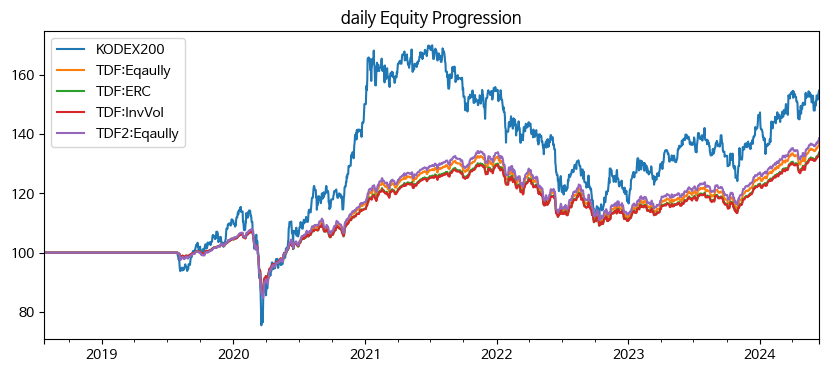

In [31]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [32]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## HANA

In [40]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 12,
    asset_names = assetnames_hana
)
bm = BacktestManager(df_hana, **kwargs_bm)

3 assets removed for shorter periods (75.0%)
running self.util_check_days_in_year to check days in a year


In [41]:
lags = dict(lookback=12, lag=0)

In [42]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [43]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

Backtesting 4 strategies: KODEX200, HANA:Eqaully, HANA:ERC, HANA:InvVol


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.86it/s]


Returning stats


,HANA:Eqaully,HANA:InvVol,KODEX200,HANA:ERC
start,2010-01-28,2010-01-28,2010-01-28,2010-01-28
end,2024-06-28,2024-06-28,2024-06-28,2024-06-28
total_return,0.483251,0.483251,0.727328,0.0
cagr,0.027727,0.027727,0.038646,0.0
calmar,1.017605,1.017605,0.113093,NaN
max_drawdown,-0.027247,-0.027247,-0.341717,0.0
avg_drawdown,-0.005004,-0.005004,-0.154354,NaN
avg_drawdown_days,106.125,106.125,725.166667,NaN
daily_vol,0.063007,0.063007,0.727798,0.0
daily_sharpe,9.897996,9.897996,1.54568,NaN


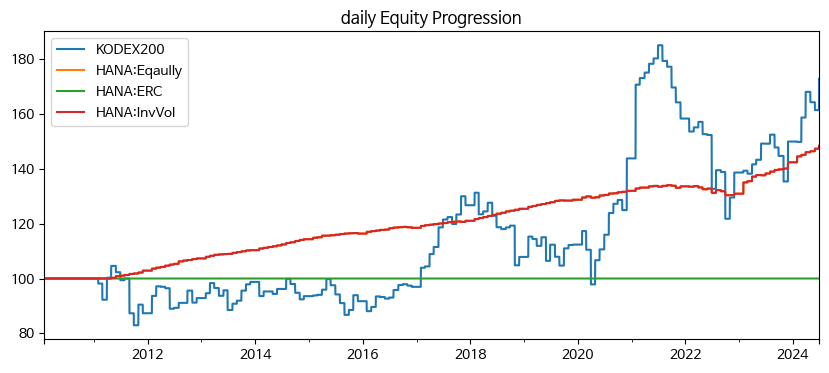

In [44]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [30]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## Summary

In [31]:
ae = AssetEvaluator(df_pf, 245)

ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246


In [32]:
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,0.324167,0.253552


# Transaction

## KOSPI200

In [33]:
kwargs = dict(
    name='KOSPI Momentum',
    file='pf_k200_momentum.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)

pf_k200 = MomentumPortfolio(df_k200, **kwargs)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-05-14 loaded.


In [34]:
kwargs = dict(
    #date = '2024-05-15',
    date = None,
    n_assets = 5,
    capital = 0,
    #save = False
    save = True
)
df = pf_k200.transaction_pipeline(**kwargs)

5 assets selected by Total return from 2023-07-10 to 2024-07-10
Weights of assets determined by ERC.
Mean absolute error of weights: 4 %
Value 26,299,650, Profit 9,661,750
All transactions saved to pf_k200_momentum_240715.csv


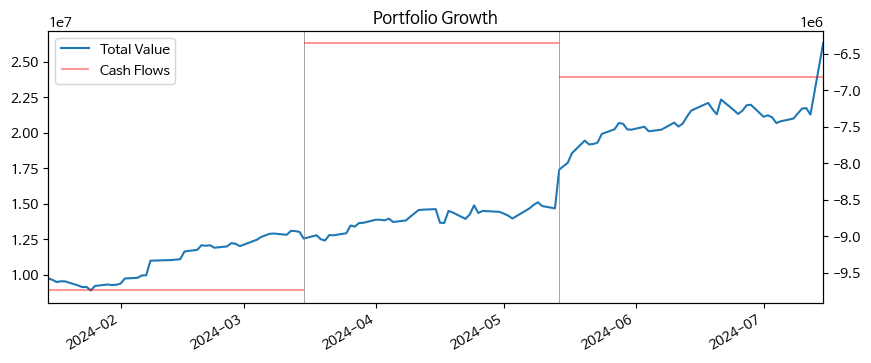

In [35]:
pf_k200.plot()

In [36]:
pf_k200.performance(metrics=metrics)

,KOSPI Momentum
start,2024-01-15
end,2024-07-15
total_return,1.700086
cagr,6.340371
calmar,72.46787
max_drawdown,-0.087492
avg_drawdown,-0.031211
avg_drawdown_days,6.823529
daily_vol,0.551563
daily_sharpe,3.987456


In [37]:
#pf_k200.performance(metrics=metrics2)
df_pf = pf_k200.get_historical()

## ETF

In [7]:
kwargs = dict(
    name='ETF6',
    file='pf_etf_static.csv',
    method_weigh='Equally', lookback=12, lag=5,
    path=path_tran,
    days_in_year=245,
    asset_names=assetnames_etf,
)

pf_etf = StaticPortfolio(df_etf, **kwargs)

period reset: 2021-12-15 ~ 2024-07-16
running self.util_check_days_in_year to check days in a year
REMINDER: make sure this is 1st transaction as no records provided


In [11]:
pf_etf.plot()

ERROR: Need more data to plot


In [12]:
pf_etf.performance(metrics=metrics)

ERROR: Need more data to measure


In [10]:
kwargs = dict(
    date = None,
    #date = '2024-07-15',
    capital = 10000000,
    save = False
    #save = True
)
pf_etf.transaction_pipeline(**kwargs)

6 assets from 2023-07-11 to 2024-07-11 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 2 %
Value 9,787,950, Profit 0
Set save=True to save transaction record


name   price  transaction  net weight  \
date       asset                                                           
2024-07-16 069500             KODEX 200   39705           41   41  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112855           14   14  0.167   
           148070          KOSEF 국고채10년  115005           14   14  0.167   
           379800      KODEX 미국S&P500TR   17765           93   93  0.167   
           411060            ACE KRX금현물   15530          107  107  0.167   
           284430        KODEX 200미국채혼합   13575          122  122  0.167   

                  weight*  
date       asset           
2024-07-16 069500   0.166  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060   0.170  
           284430   0.169

In [42]:
df_pf = df_pf.to_frame().join(pf_etf.get_historical(), how='outer')

## IRP

In [43]:
choice = ['K55301BU6139', 'K55206C95800']

In [44]:
kwargs = dict(
    name='TDF2',
    file='pf_tdf_static.csv',
    lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_tdf,
)

pf_tdf = StaticPortfolio(df_tdf[choice], **kwargs)

period reset: 2018-07-26 ~ 2024-07-14
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-06-19 loaded.


In [45]:
kwargs = dict(
    method_weigh = 'Equally', 
    date = '2024-06-19',
    save = True
)
df = pf_tdf.transaction_pipeline(**kwargs)

2 assets from 2023-06-14 to 2024-06-14 prepared for weight analysis
ERROR: check the date as no new transaction
The profit from the most recent transaction: 0


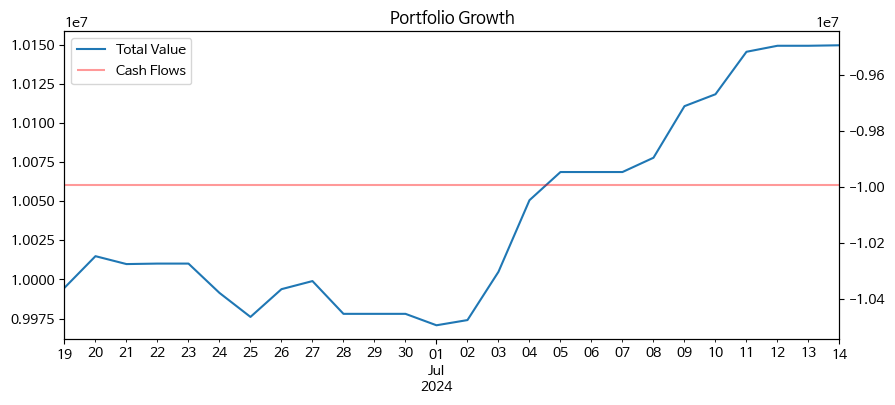

In [46]:
pf_tdf.plot()

In [47]:
pf_tdf.performance(metrics=metrics)

,TDF2
start,2024-06-19
end,2024-07-14
total_return,0.01553
cagr,0.252514
calmar,57.175393
max_drawdown,-0.004416
avg_drawdown,-0.004416
avg_drawdown_days,13.0
daily_vol,0.025607
daily_sharpe,6.080427


In [48]:
df_pf = df_pf.join(pf_tdf.get_historical(), how='outer')
df_pf.tail()

,KOSPI Momentum,ETF6,TDF2
2024-07-11,21730600.0,NaN,1.014572e+07
2024-07-12,21270700.0,NaN,1.014957e+07
2024-07-13,NaN,NaN,1.014957e+07
2024-07-14,NaN,NaN,1.014988e+07
2024-07-15,26299650.0,NaN,NaN


## Summary

In [33]:
ae = AssetEvaluator(df_pf, 242)
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

KODEX200: 245
KOSPI:Momentum: 245
ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246


,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,0.324167,0.253552


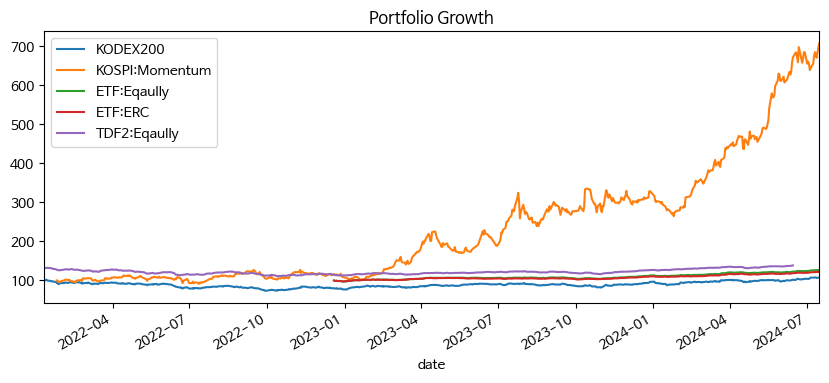

In [34]:
_ = ae.plot_historical()

# testing

In [7]:
import pandas as pd

df_etfm = df_etf.groupby(pd.Grouper(freq='MS'), sort=True).head(1)
df_etfm.tail()

,069500,273130,148070,379800,411060,284430
Date,,,,,,
2024-03-04,35913,109220,110955,15485.0,12670.0,12690
2024-04-01,37518,110000,111740,16130.0,14350.0,13035
2024-05-02,36515,109390,109990,15750.0,14815.0,12800
2024-06-03,36660,110245,111245,16540.0,14685.0,12885
2024-07-01,38620,111595,113225,17180.0,14755.0,13260


In [64]:
df_etfm2 = df_etfm.reindex(df_etf.index, method='ffill')
df_etfm2

,069500,273130,148070,379800,411060,284430
Date,,,,,,
2021-01-04,37496,109955,117558,NaN,NaN,12780
2021-01-05,37496,109955,117558,NaN,NaN,12780
2021-01-06,37496,109955,117558,NaN,NaN,12780
2021-01-07,37496,109955,117558,NaN,NaN,12780
2021-01-08,37496,109955,117558,NaN,NaN,12780
...,...,...,...,...,...,...
2024-07-10,38620,111595,113225,17180.0,14755.0,13260
2024-07-11,38620,111595,113225,17180.0,14755.0,13260
2024-07-12,38620,111595,113225,17180.0,14755.0,13260


In [65]:
lags = dict(lookback=12, lag=0)

kwargs_build = dict(
    #freq = 'Y', 
    freq = 'Once', 
    select = 'all',
    **lags # added to start backtest on same date with momentum
)

#align_axis = 1
align_axis = 0

In [75]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = align_axis, 
    days_in_year = 12,
    asset_names = assetnames_etf
)
bm12 = BacktestManager(df_etfm[['069500']], **kwargs_bm)

running self.util_check_days_in_year to check days in a year


In [76]:
bm12.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm12.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm12.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [77]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = align_axis, 
    days_in_year = 246,
    asset_names = assetnames_etf
)
bm12d = BacktestManager(df_etfm2[['069500']], **kwargs_bm)

running self.util_check_days_in_year to check days in a year


In [78]:
bm12d.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm12d.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm12d.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [79]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = align_axis, 
    days_in_year = 246,
    asset_names = assetnames_etf
)
bm = BacktestManager(df_etf[['069500']], **kwargs_bm)

running self.util_check_days_in_year to check days in a year


In [80]:
bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [81]:
s1 = bm.run(plot=False, metrics='all')

Backtesting 3 strategies: HANA:Eqaully, HANA:ERC, HANA:InvVol


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.27it/s]


Returning stats


In [82]:
s2 = bm12.run(plot=False, metrics='all')

Backtesting 3 strategies: HANA:Eqaully, HANA:ERC, HANA:InvVol


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.70it/s]

Returning stats


In [84]:
ss = s1.iloc[:,0].to_frame('Daily').join(s2.iloc[:,0].to_frame('Monthly'))

In [85]:
s3 = bm12d.run(plot=False, metrics='all')

Backtesting 3 strategies: HANA:Eqaully, HANA:ERC, HANA:InvVol


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.32it/s]


Returning stats


In [86]:
ss.join(s3.iloc[:,0].to_frame('Monthly2'))

,Daily,Monthly,Monthly2
start,2021-01-03,2021-01-03,2021-01-03
end,2024-07-16,2024-07-01,2024-07-16
rf,0.0,0.0,0.0
total_return,0.052709,0.023956,0.023956
cagr,0.01465,0.006805,0.006725
max_drawdown,-0.279416,-0.261979,-0.261979
calmar,0.052431,0.025975,0.025672
mtd,0.030079,0.053435,0.053435
three_month,0.110879,0.029357,0.029357
six_month,0.194163,0.167619,0.077194


In [21]:
from ffn import calc_stats

df1 = df_etf['069500']
df2 = df_etfm['069500']

calc_stats(df1).stats.to_frame('Daily').join(calc_stats(df2).stats.to_frame('Monthly'))

,Daily,Monthly
start,2021-01-04 00:00:00,2021-01-04 00:00:00
end,2024-07-16 00:00:00,2024-07-01 00:00:00
rf,0.0,0.0
total_return,0.058913,0.029977
cagr,0.016353,0.008504
max_drawdown,-0.343243,-0.321947
calmar,0.047641,0.026414
mtd,0.030095,0.053464
three_month,0.11094,0.029373
six_month,0.194279,0.16772


In [22]:
from ffn import calc_perf_stats, PerformanceStats, GroupStats


class GroupStats2(GroupStats):
    def __init__(self, *args, annualization_factor=252, **kwargs):
        self.annualization_factor = annualization_factor
        super().__init__(*args, **kwargs)

    def _calculate(self, data):
        self.prices = data
        factor = self.annualization_factor
        for c in data.columns:
            prc = data[c]
            self[c] = PerformanceStats(prc, annualization_factor=factor)



def calc_stats2(prices, annualization_factor=252):
    """
    Calculates performance stats of a given object.

    If object is Series, a PerformanceStats object is
    returned. If object is DataFrame, a GroupStats object
    is returned.

    Args:
        * prices (Series, DataFrame): Set of prices
    """
    if isinstance(prices, pd.Series):
        return PerformanceStats(prices, annualization_factor=annualization_factor)
    elif isinstance(prices, pd.DataFrame):
        return GroupStats(*[prices[x] for x in prices.columns], 
                          annualization_factor=annualization_factor)
    else:
        raise NotImplementedError("Unsupported type")


calc_stats2(df1, 246).stats.to_frame('Daily').join(calc_stats2(df2, 12).stats.to_frame('Monthly'))

,Daily,Monthly
start,2021-01-04 00:00:00,2021-01-04 00:00:00
end,2024-07-16 00:00:00,2024-07-01 00:00:00
rf,0.0,0.0
total_return,0.058913,0.029977
cagr,0.016353,0.008504
max_drawdown,-0.343243,-0.321947
calmar,0.047641,0.026414
mtd,0.030095,0.053464
three_month,0.11094,0.029373
six_month,0.194279,0.16772


In [24]:
from ffn import calc_perf_stats

calc_perf_stats(df1).stats.to_frame('Daily').join(calc_perf_stats(df2).stats.to_frame('Monthly'))

,Daily,Monthly
start,2021-01-04 00:00:00,2021-01-04 00:00:00
end,2024-07-16 00:00:00,2024-07-01 00:00:00
rf,0.0,0.0
total_return,0.058913,0.029977
cagr,0.016353,0.008504
max_drawdown,-0.343243,-0.321947
calmar,0.047641,0.026414
mtd,0.030095,0.053464
three_month,0.11094,0.029373
six_month,0.194279,0.16772


In [37]:
prc = bm.portfolios['HANA:Eqaully'].strategy.prices
prc.head()

2021-01-03    100.0
2021-01-04    100.0
2021-01-05    100.0
2021-01-06    100.0
2021-01-07    100.0
Name: price, dtype: float64

In [30]:
prc12 = bm12.portfolios['HANA:Eqaully'].strategy.prices

In [35]:
prc12.head()

2021-01-03    100.0
2021-01-04    100.0
2021-02-01    100.0
2021-03-02    100.0
2021-04-01    100.0
Name: price, dtype: float64

In [36]:
df_etfm.head()

,069500,273130,148070,379800,411060,284430
Date,,,,,,
2021-01-04,37496,109955,117558,NaN,NaN,12780
2021-02-01,39029,109700,117065,NaN,NaN,13180
2021-03-02,39047,109140,115813,NaN,NaN,13085
2021-04-01,39417,108775,115597,NaN,NaN,12965
2021-05-03,39525,108535,114729,10325.0,NaN,13040


In [33]:
calc_perf_stats(prc12.iloc[1:]).stats

start                    2021-01-04 00:00:00
end                      2024-07-01 00:00:00
rf                                       0.0
total_return                        0.023956
cagr                                 0.00681
max_drawdown                       -0.261979
calmar                              0.025995
mtd                                 0.053435
three_month                         0.029357
six_month                           0.167619
ytd                                 0.167619
one_year                            0.163891
three_year                          0.007921
five_year                                NaN
ten_year                                 NaN
incep                                0.00681
daily_sharpe                             NaN
daily_sortino                            NaN
daily_mean                               NaN
daily_vol                                NaN
daily_skew                               NaN
daily_kurt                               NaN
best_day  

In [59]:
bm.get_transactions(0)

HANA:Eqaully: transactions returned


,,price,quantity
Date,Security,,
2022-01-03,069500,37716.0,265.0


In [60]:
bm12.get_transactions(0)

HANA:Eqaully: transactions returned


,,price,quantity
Date,Security,,
2022-01-03,069500,37716.0,265.0


In [56]:
bm.get_historical([0,1])

,HANA:Eqaully,HANA:ERC
2022-01-03,100.00000,100.00000
2022-01-04,99.93375,99.93375
2022-01-05,98.51070,98.51070
2022-01-06,97.52490,97.52490
2022-01-07,98.74390,98.74390
...,...,...
2024-07-10,105.35035,105.35035
2024-07-11,105.99960,105.99960
2024-07-12,104.54210,104.54210
2024-07-15,105.20460,105.20460


In [57]:
bm12.get_historical([0,1])

IndexError: single positional indexer is out-of-bounds

In [87]:
bm12d.get_historical([0,1])

,HANA:Eqaully,HANA:ERC
2022-01-03,100.0000,100.0000
2022-01-04,100.0000,100.0000
2022-01-05,100.0000,100.0000
2022-01-06,100.0000,100.0000
2022-01-07,100.0000,100.0000
...,...,...
2024-07-10,102.3956,102.3956
2024-07-11,102.3956,102.3956
2024-07-12,102.3956,102.3956
2024-07-15,102.3956,102.3956


In [149]:
df1 = df_etf['069500']
df2 = df_etfm['069500']
df1[-1]/df1[0] - 1, df2[-1]/df2[0] - 1

(0.058912950714743006, 0.029976530829955106)

In [160]:
(df1[-1]/df1[0]) ** (240/len(df1)) - 1, (df2[-1]/df2[0]) ** (12/len(df2)) - 1

(0.01587967967027004, 0.00827667305300439)

In [167]:
df1.pct_change().mean() * 246, df2.pct_change().mean() * 12

(0.03061788202400134, 0.023329418815732916)

In [184]:
df1.pct_change().std() * (246 ** .5), df2.pct_change().std() * (12 ** .5)

(0.17017365461110245, 0.1736610108074206)